## Objective of the Data Analysis

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

loandata = pd.read_csv("loan.csv", encoding = "ANSI")
loandata

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [86]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Data Understanding

Before we start cleaning data, it is vital to understand what the data is, and what we want to achieve. Without that understanding, we have no basis from which to make decisions about what data is relevant as we clean and prepare our data.

We’ll be working with some data from Lending Club, a marketplace for personal loans that matches borrowers who are seeking a loan with investors looking to lend money and make a return. Each borrower fills out a comprehensive application, providing their past financial history, the reason for the loan, and more. Lending Club evaluates each borrower’s credit score using past historical data and assigns an interest rate to the borrower.
The main objective of this analysis is to find the variables which indicates that a borrower can default, which will help the company to decide whether to reject or a issue a loan.
We need to find those loan attributes and personal attributes which indicates that a borrower will default.
The main variables we have to look into are -:
1. Loan Characteristics
2. Borrower Characteristics
3. Credit Line Characteristics

## Data Cleaning

In [111]:
# Target variable
loandata['loan_status'].value_counts(dropna=False)

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [87]:
# Dropping columns with all rows equal to NaN

loandatawithoutnullcolumns = loandata.dropna(axis=1, how='all')
loandatawithoutnullcolumns.shape

(39717, 57)

In [88]:
#As per the Data understanding, we have to select those loan attributes and personal attributes which may have an impact on 
#defaulting.

listofimpattributes = ["id","member_id","loan_amnt","term","int_rate","installment","grade","sub_grade","emp_length",
                      "home_ownership","annual_inc","verification_status","loan_status","purpose","dti","delinq_2yrs",
                      "earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc",
                      "pub_rec","revol_bal","revol_util","total_acc","chargeoff_within_12_mths",
                       "pub_rec_bankruptcies","tax_liens"]
listofimpattributes

['id',
 'member_id',
 'loan_amnt',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'loan_status',
 'purpose',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'chargeoff_within_12_mths',
 'pub_rec_bankruptcies',
 'tax_liens']

In [89]:
# Creating master table with relevant attributes

master_loandata = loandatawithoutnullcolumns.loc[:,listofimpattributes]
master_loandata

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,NaN,NaN,3,0,13648,83.70%,9,0.0,0.0,0.0
1,1077430,1314167,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,NaN,NaN,3,0,1687,9.40%,4,0.0,0.0,0.0
2,1077175,1313524,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,NaN,NaN,2,0,2956,98.50%,10,0.0,0.0,0.0
3,1076863,1277178,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,35.0,NaN,10,0,5598,21%,37,0.0,0.0,0.0
4,1075358,1311748,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,...,38.0,NaN,15,0,27783,53.90%,38,0.0,0.0,0.0
5,1075269,1311441,5000,36 months,7.90%,156.46,A,A4,3 years,RENT,...,NaN,NaN,9,0,7963,28.30%,12,0.0,0.0,0.0
6,1069639,1304742,7000,60 months,15.96%,170.08,C,C5,8 years,RENT,...,NaN,NaN,7,0,17726,85.60%,11,0.0,0.0,0.0
7,1072053,1288686,3000,36 months,18.64%,109.43,E,E1,9 years,RENT,...,NaN,NaN,4,0,8221,87.50%,4,0.0,0.0,0.0
8,1071795,1306957,5600,60 months,21.28%,152.39,F,F2,4 years,OWN,...,NaN,NaN,11,0,5210,32.60%,13,0.0,0.0,0.0
9,1071570,1306721,5375,60 months,12.69%,121.45,B,B5,< 1 year,RENT,...,NaN,NaN,2,0,9279,36.50%,3,0.0,0.0,0.0


In [90]:
#Find the % of null in every column

round(100*(master_loandata.isnull().sum()/len(master_loandata.index)),2)

id                           0.00
member_id                    0.00
loan_amnt                    0.00
term                         0.00
int_rate                     0.00
installment                  0.00
grade                        0.00
sub_grade                    0.00
emp_length                   2.71
home_ownership               0.00
annual_inc                   0.00
verification_status          0.00
loan_status                  0.00
purpose                      0.00
dti                          0.00
delinq_2yrs                  0.00
earliest_cr_line             0.00
inq_last_6mths               0.00
mths_since_last_delinq      64.66
mths_since_last_record      92.99
open_acc                     0.00
pub_rec                      0.00
revol_bal                    0.00
revol_util                   0.13
total_acc                    0.00
chargeoff_within_12_mths     0.14
pub_rec_bankruptcies         1.75
tax_liens                    0.10
dtype: float64

In [91]:
#Removing all columns with more than 50% missing values
master_loandata = master_loandata.drop('mths_since_last_record', axis=1)
half_count = len(master_loandata) / 2
master_loandata = master_loandata.dropna(thresh=half_count,axis=1)

In [92]:
master_loandata.shape

(39717, 26)

In [93]:
master_loandata.chargeoff_within_12_mths.describe()
#Dropping off chargeoff_within_12_mths since almost all values are zeros
master_loandata = master_loandata.drop('chargeoff_within_12_mths', axis=1)

master_loandata.tax_liens.describe()
#Dropping off chargeoff_within_12_mths since almost all values are zeros
master_loandata = master_loandata.drop('tax_liens', axis=1)

In [94]:
master_loandata.pub_rec_bankruptcies.describe()
# Replacing NaN with median 
master_loandata.loc[master_loandata['pub_rec_bankruptcies'].isnull(), ['pub_rec_bankruptcies']] = master_loandata['pub_rec_bankruptcies'].median()
master_loandata

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,1077501,1296599,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0
1,1077430,1314167,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0
2,1077175,1313524,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.0
3,1076863,1277178,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,20.00,0,Feb-96,1,10,0,5598,21%,37,0.0
4,1075358,1311748,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,...,17.94,0,Jan-96,0,15,0,27783,53.90%,38,0.0
5,1075269,1311441,5000,36 months,7.90%,156.46,A,A4,3 years,RENT,...,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.0
6,1069639,1304742,7000,60 months,15.96%,170.08,C,C5,8 years,RENT,...,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.0
7,1072053,1288686,3000,36 months,18.64%,109.43,E,E1,9 years,RENT,...,5.35,0,Jan-07,2,4,0,8221,87.50%,4,0.0
8,1071795,1306957,5600,60 months,21.28%,152.39,F,F2,4 years,OWN,...,5.55,0,Apr-04,2,11,0,5210,32.60%,13,0.0
9,1071570,1306721,5375,60 months,12.69%,121.45,B,B5,< 1 year,RENT,...,18.08,0,Sep-04,0,2,0,9279,36.50%,3,0.0


In [95]:
#Remove Columns with only One Value
master_loandata = master_loandata.loc[:,master_loandata.apply(pd.Series.nunique) != 1]

In [96]:
master_loandata[master_loandata.revol_util.isnull()] 
# FILLING NULL VALUES IN REVOL_UTIL WITH 0% SINCE MOST OF REVOL_BAL CORRESPONDING IS 0
master_loandata.loc[master_loandata['revol_util'].isnull(), ['revol_util']] = "0%"
master_loandata

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,1077501,1296599,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0
1,1077430,1314167,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0
2,1077175,1313524,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.0
3,1076863,1277178,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,20.00,0,Feb-96,1,10,0,5598,21%,37,0.0
4,1075358,1311748,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,...,17.94,0,Jan-96,0,15,0,27783,53.90%,38,0.0
5,1075269,1311441,5000,36 months,7.90%,156.46,A,A4,3 years,RENT,...,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.0
6,1069639,1304742,7000,60 months,15.96%,170.08,C,C5,8 years,RENT,...,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.0
7,1072053,1288686,3000,36 months,18.64%,109.43,E,E1,9 years,RENT,...,5.35,0,Jan-07,2,4,0,8221,87.50%,4,0.0
8,1071795,1306957,5600,60 months,21.28%,152.39,F,F2,4 years,OWN,...,5.55,0,Apr-04,2,11,0,5210,32.60%,13,0.0
9,1071570,1306721,5375,60 months,12.69%,121.45,B,B5,< 1 year,RENT,...,18.08,0,Sep-04,0,2,0,9279,36.50%,3,0.0


In [97]:
master_loandata.revol_util= master_loandata.revol_util.apply(lambda x: x.replace('%',''))
master_loandata.int_rate= master_loandata.int_rate.apply(lambda x: x.replace('%',''))

In [98]:
# Dropping revol_bal since revol_util is given in dataset, subgrade since grade is present, id and member_id which are not required in ou
master_loandata = master_loandata.drop(['revol_bal','sub_grade','id','member_id'], axis=1)
master_loandata

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,36 months,10.65,162.87,B,10+ years,RENT,24000.00,Verified,Fully Paid,credit_card,27.65,0,Jan-85,1,3,0,83.70,9,0.0
1,2500,60 months,15.27,59.83,C,< 1 year,RENT,30000.00,Source Verified,Charged Off,car,1.00,0,Apr-99,5,3,0,9.40,4,0.0
2,2400,36 months,15.96,84.33,C,10+ years,RENT,12252.00,Not Verified,Fully Paid,small_business,8.72,0,Nov-01,2,2,0,98.50,10,0.0
3,10000,36 months,13.49,339.31,C,10+ years,RENT,49200.00,Source Verified,Fully Paid,other,20.00,0,Feb-96,1,10,0,21,37,0.0
4,3000,60 months,12.69,67.79,B,1 year,RENT,80000.00,Source Verified,Current,other,17.94,0,Jan-96,0,15,0,53.90,38,0.0
5,5000,36 months,7.90,156.46,A,3 years,RENT,36000.00,Source Verified,Fully Paid,wedding,11.20,0,Nov-04,3,9,0,28.30,12,0.0
6,7000,60 months,15.96,170.08,C,8 years,RENT,47004.00,Not Verified,Fully Paid,debt_consolidation,23.51,0,Jul-05,1,7,0,85.60,11,0.0
7,3000,36 months,18.64,109.43,E,9 years,RENT,48000.00,Source Verified,Fully Paid,car,5.35,0,Jan-07,2,4,0,87.50,4,0.0
8,5600,60 months,21.28,152.39,F,4 years,OWN,40000.00,Source Verified,Charged Off,small_business,5.55,0,Apr-04,2,11,0,32.60,13,0.0
9,5375,60 months,12.69,121.45,B,< 1 year,RENT,15000.00,Verified,Charged Off,other,18.08,0,Sep-04,0,2,0,36.50,3,0.0


In [99]:
# Coverting int_rate and  to numeric type
round(100*(master_loandata.isnull().sum()/len(master_loandata.index)),2)
# master_loandata.int_rate = pd.to_numeric(master_loandata.int_rate)

loan_amnt               0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
emp_length              2.71
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
loan_status             0.00
purpose                 0.00
dti                     0.00
delinq_2yrs             0.00
earliest_cr_line        0.00
inq_last_6mths          0.00
open_acc                0.00
pub_rec                 0.00
revol_util              0.00
total_acc               0.00
pub_rec_bankruptcies    0.00
dtype: float64

In [100]:
# master_loandata.revol_util.corr(master_loandata.int_rate)
numeric_columns = ['loan_amnt','installment','annual_inc','dti']
master_loandata[numeric_columns] = master_loandata[numeric_columns].apply(pd.to_numeric)

In [101]:
master_loandata['int_rate'] = master_loandata['int_rate'].astype('float')
master_loandata['revol_util'] = master_loandata['revol_util'].astype('float')

In [107]:
print(master_loandata.emp_length.unique())
master_loandata.emp_length.fillna('0',inplace=True)

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]


In [108]:
#Divide the emp_length into groups

def formgrps(x):
    if x == "< 1 year":
        return "0"
    elif x == "10+ years":
        return 10
    else:
        return x[0]

master_loandata['emp_length'] = master_loandata['emp_length'].apply(formgrps)
master_loandata.emp_length = pd.to_numeric(master_loandata.emp_length)
master_loandata

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,36 months,10.65,162.87,B,10,RENT,24000.00,Verified,Fully Paid,credit_card,27.65,0,Jan-85,1,3,0,83.70,9,0.0
1,2500,60 months,15.27,59.83,C,0,RENT,30000.00,Source Verified,Charged Off,car,1.00,0,Apr-99,5,3,0,9.40,4,0.0
2,2400,36 months,15.96,84.33,C,10,RENT,12252.00,Not Verified,Fully Paid,small_business,8.72,0,Nov-01,2,2,0,98.50,10,0.0
3,10000,36 months,13.49,339.31,C,10,RENT,49200.00,Source Verified,Fully Paid,other,20.00,0,Feb-96,1,10,0,21.00,37,0.0
4,3000,60 months,12.69,67.79,B,1,RENT,80000.00,Source Verified,Current,other,17.94,0,Jan-96,0,15,0,53.90,38,0.0
5,5000,36 months,7.90,156.46,A,3,RENT,36000.00,Source Verified,Fully Paid,wedding,11.20,0,Nov-04,3,9,0,28.30,12,0.0
6,7000,60 months,15.96,170.08,C,8,RENT,47004.00,Not Verified,Fully Paid,debt_consolidation,23.51,0,Jul-05,1,7,0,85.60,11,0.0
7,3000,36 months,18.64,109.43,E,9,RENT,48000.00,Source Verified,Fully Paid,car,5.35,0,Jan-07,2,4,0,87.50,4,0.0
8,5600,60 months,21.28,152.39,F,4,OWN,40000.00,Source Verified,Charged Off,small_business,5.55,0,Apr-04,2,11,0,32.60,13,0.0
9,5375,60 months,12.69,121.45,B,0,RENT,15000.00,Verified,Charged Off,other,18.08,0,Sep-04,0,2,0,36.50,3,0.0


In [109]:
round(100*(master_loandata.isnull().sum()/len(master_loandata.index)),2)

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
delinq_2yrs             0.0
earliest_cr_line        0.0
inq_last_6mths          0.0
open_acc                0.0
pub_rec                 0.0
revol_util              0.0
total_acc               0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [113]:
from datetime import datetime

master_loandata.earliest_cr_line = master_loandata.earliest_cr_line.apply(lambda x: datetime.strptime(x, '%b-%y'))

In [114]:
master_loandata

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,1077501,5000,36 months,10.65,162.87,B,2,10,RENT,24000.00,...,credit_card,27.65,0,1985-01-01,1,3,0,83.70,9,0.0
1,1077430,2500,60 months,15.27,59.83,C,4,0,RENT,30000.00,...,car,1.00,0,1999-04-01,5,3,0,9.40,4,0.0
2,1077175,2400,36 months,15.96,84.33,C,5,10,RENT,12252.00,...,small_business,8.72,0,2001-11-01,2,2,0,98.50,10,0.0
3,1076863,10000,36 months,13.49,339.31,C,1,10,RENT,49200.00,...,other,20.00,0,1996-02-01,1,10,0,21.00,37,0.0
4,1075358,3000,60 months,12.69,67.79,B,5,1,RENT,80000.00,...,other,17.94,0,1996-01-01,0,15,0,53.90,38,0.0
5,1075269,5000,36 months,7.90,156.46,A,4,3,RENT,36000.00,...,wedding,11.20,0,2004-11-01,3,9,0,28.30,12,0.0
6,1069639,7000,60 months,15.96,170.08,C,5,8,RENT,47004.00,...,debt_consolidation,23.51,0,2005-07-01,1,7,0,85.60,11,0.0
7,1072053,3000,36 months,18.64,109.43,E,1,9,RENT,48000.00,...,car,5.35,0,2007-01-01,2,4,0,87.50,4,0.0
8,1071795,5600,60 months,21.28,152.39,F,2,4,OWN,40000.00,...,small_business,5.55,0,2004-04-01,2,11,0,32.60,13,0.0
9,1071570,5375,60 months,12.69,121.45,B,5,0,RENT,15000.00,...,other,18.08,0,2004-09-01,0,2,0,36.50,3,0.0


## Data Analysis

In [117]:
chargedoff_loandata = master_loandata[master_loandata.loan_status == "Charged Off"]
complete_loandata = master_loandata.loc[(master_loandata.loan_status == "Fully Paid") | (master_loandata.loan_status == "Current"), :]

chargedoff_loandata
master_loandata

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,36 months,10.65,162.87,B,10,RENT,24000.00,Verified,Fully Paid,credit_card,27.65,0,Jan-85,1,3,0,83.70,9,0.0
1,2500,60 months,15.27,59.83,C,0,RENT,30000.00,Source Verified,Charged Off,car,1.00,0,Apr-99,5,3,0,9.40,4,0.0
2,2400,36 months,15.96,84.33,C,10,RENT,12252.00,Not Verified,Fully Paid,small_business,8.72,0,Nov-01,2,2,0,98.50,10,0.0
3,10000,36 months,13.49,339.31,C,10,RENT,49200.00,Source Verified,Fully Paid,other,20.00,0,Feb-96,1,10,0,21.00,37,0.0
4,3000,60 months,12.69,67.79,B,1,RENT,80000.00,Source Verified,Current,other,17.94,0,Jan-96,0,15,0,53.90,38,0.0
5,5000,36 months,7.90,156.46,A,3,RENT,36000.00,Source Verified,Fully Paid,wedding,11.20,0,Nov-04,3,9,0,28.30,12,0.0
6,7000,60 months,15.96,170.08,C,8,RENT,47004.00,Not Verified,Fully Paid,debt_consolidation,23.51,0,Jul-05,1,7,0,85.60,11,0.0
7,3000,36 months,18.64,109.43,E,9,RENT,48000.00,Source Verified,Fully Paid,car,5.35,0,Jan-07,2,4,0,87.50,4,0.0
8,5600,60 months,21.28,152.39,F,4,OWN,40000.00,Source Verified,Charged Off,small_business,5.55,0,Apr-04,2,11,0,32.60,13,0.0
9,5375,60 months,12.69,121.45,B,0,RENT,15000.00,Verified,Charged Off,other,18.08,0,Sep-04,0,2,0,36.50,3,0.0


In [114]:
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if continuous:
        sns.distplot(master_loandata.loc[master_loandata[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(master_loandata[col_name], order=sorted(master_loandata[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=master_loandata, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        charge_off_rates = master_loandata.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged-off')
        ax2.set_title('Charge-off Rate by ' + full_name)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

# Univariate Analysis

In [116]:
# Loan Amount
master_loandata['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Loan amount range from 500 to 35000 dollars with median of 10000 dollars. More people default at higher loan amount as shown
by BoxPlot.

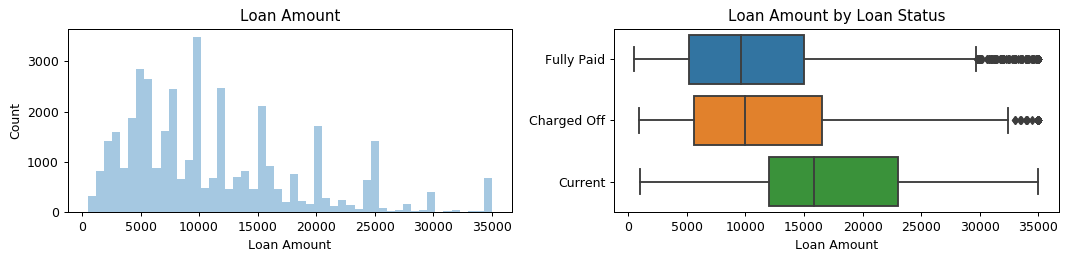

In [115]:
plot_var('loan_amnt', 'Loan Amount', continuous=True)

In [119]:
# Term
master_loandata['term'].value_counts(dropna=False)

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [121]:
#Convert to integer
master_loandata['term'] = master_loandata['term'].apply(lambda s: np.int8(s.split()[0]))

In [122]:
master_loandata['term'].value_counts(normalize=True)

36    0.732583
60    0.267417
Name: term, dtype: float64

In [124]:
#Compare the charge-off rate by loan period:
master_loandata.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

term
36    0.110909
60    0.225967
Name: loan_status, dtype: float64

Loans with five-year periods are more than twice as likely to charge-off as loans with three-year periods.

In [125]:
master_loandata['int_rate'].describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

Interest rates range from 5.42% to 24.59% (!) with a median of 13.1%.

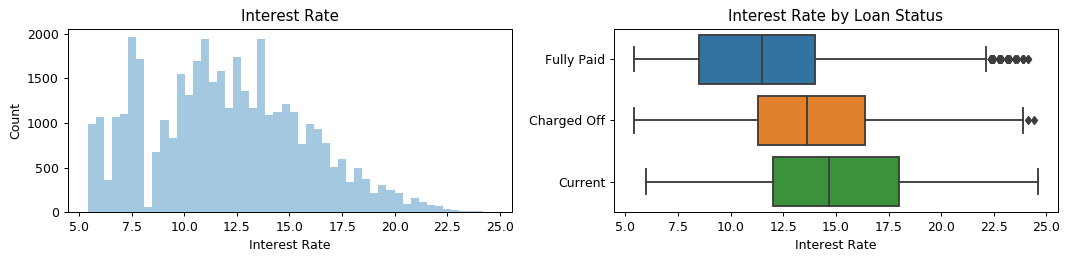

In [129]:
plot_var('int_rate', 'Interest Rate', continuous=True)

In [131]:
#Installment
master_loandata['installment'].describe()

count    39717.000000
mean       324.561922
std        208.874874
min         15.690000
25%        167.020000
50%        280.220000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64

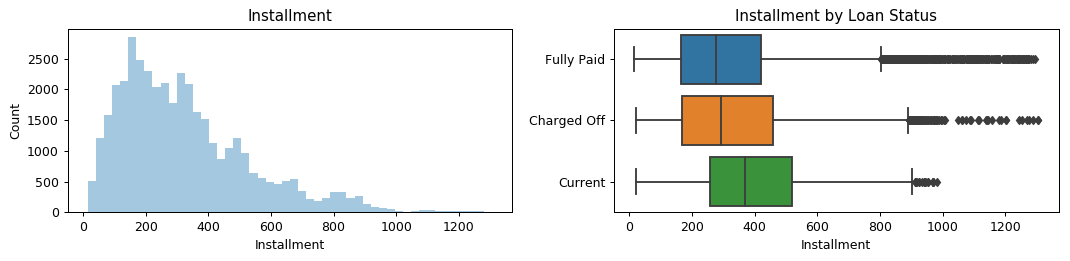

In [133]:
plot_var('installment', 'Installment', continuous=True)

In [134]:
master_loandata.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,336.175006,217.051841,22.79,168.5550,293.87,457.840,1305.19
Current,1140.0,395.476061,204.492991,21.74,258.4700,368.19,519.725,981.45
Fully Paid,32950.0,320.125232,207.081110,15.69,165.2825,275.65,420.735,1295.21


The average installments for charged off loans are higher

In [135]:
#grade
master_loandata.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

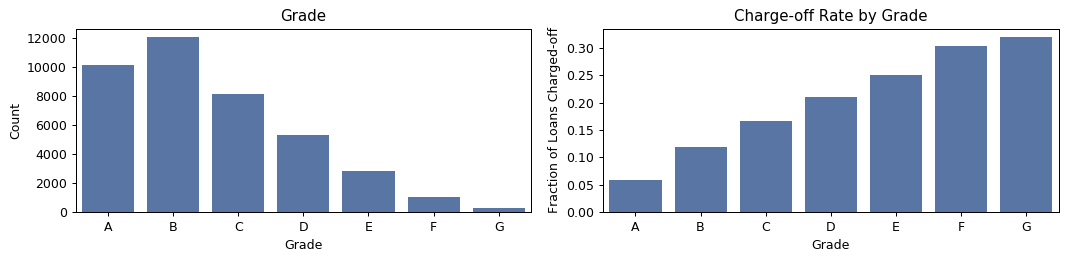

In [136]:
plot_var('grade', 'Grade', continuous=False)

As the grade of the borrower becomes worse, the probability of chargeoff increases.

In [139]:
# emp_length
master_loandata['emp_length'].value_counts(dropna=False).sort_index()

0     5658
1     3240
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
10    8879
Name: emp_length, dtype: int64

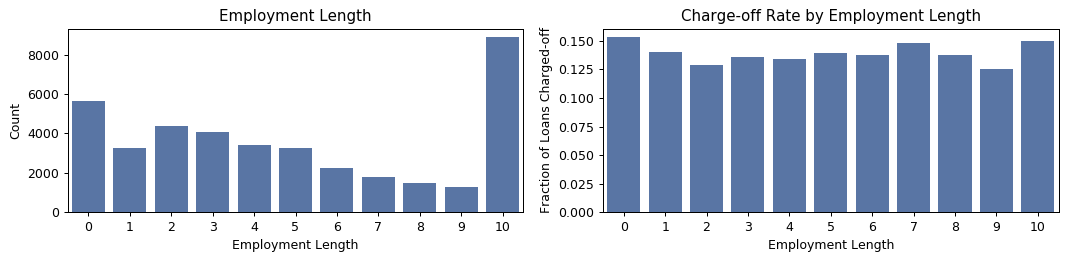

In [140]:
plot_var('emp_length', 'Employment Length', continuous=False)

Loan status does not appear to vary much with employment length on average, except that it is higher for people with no experience(may be students) or people above 10 years of experience.

In [141]:
# home_ownership
master_loandata['home_ownership'].value_counts(dropna=False)

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [143]:
master_loandata['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)

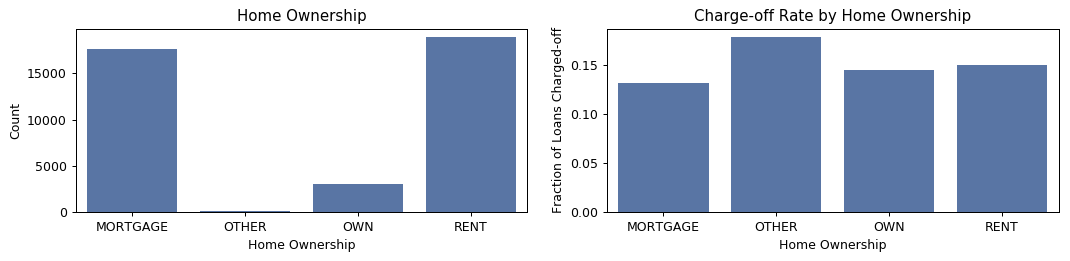

In [146]:
plot_var('home_ownership', 'Home Ownership', continuous=False)

In [144]:
master_loandata.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

home_ownership
MORTGAGE    0.131774
OTHER       0.178218
OWN         0.144866
RENT        0.150220
Name: loan_status, dtype: float64

The Home owners in "Other" category has higher probability of defaulting.

In [147]:
#Annual income
master_loandata['annual_inc'].describe().astype(str)

count               39717.0
mean      68968.92637711817
std      63793.765790045836
min                  4000.0
25%                 40404.0
50%                 59000.0
75%                 82300.0
max               6000000.0
Name: annual_inc, dtype: object

In [148]:
master_loandata['log_annual_inc'] = master_loandata['annual_inc'].apply(lambda x: np.log10(x+1))

In [149]:
master_loandata.drop('annual_inc', axis=1, inplace=True)

In [150]:
master_loandata['log_annual_inc'].describe()

count    39717.000000
mean         4.765509
std          0.242700
min          3.602169
25%          4.606435
50%          4.770859
75%          4.915405
max          6.778151
Name: log_annual_inc, dtype: float64

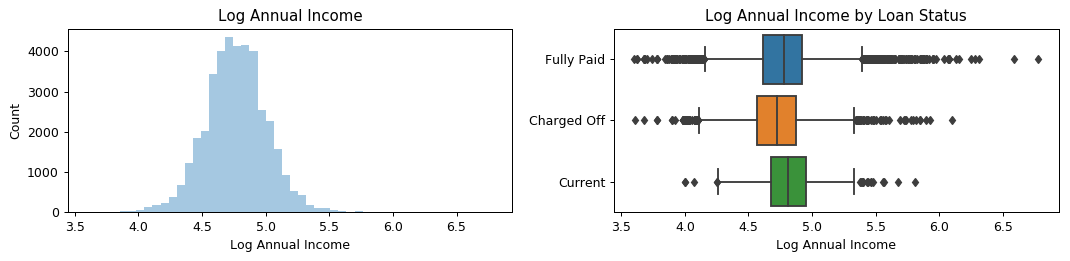

In [151]:
plot_var('log_annual_inc', 'Log Annual Income', continuous=True)

In [152]:
master_loandata.groupby('loan_status')['log_annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,4.723318,0.243179,3.610767,4.568213,4.724284,4.875067,6.096910
Current,1140.0,4.817910,0.221702,3.998303,4.676474,4.812920,4.954247,5.812914
Fully Paid,32950.0,4.770901,0.242438,3.602169,4.614198,4.778158,4.924284,6.778151


Individuals with higher incomes are more likely to pay off their 
loans.

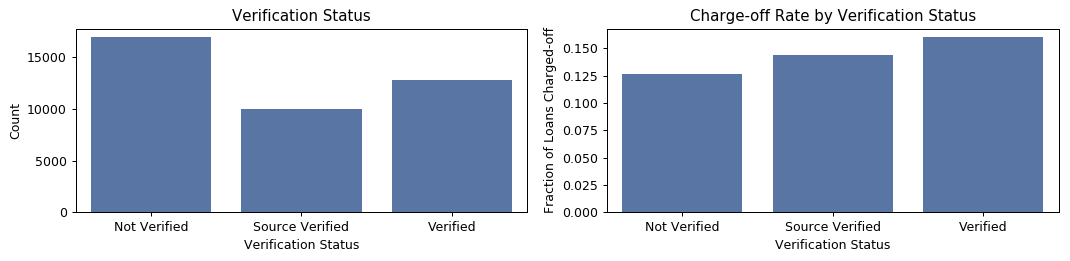

In [153]:
#Verifiaction_status
plot_var('verification_status', 'Verification Status', continuous=False)

In [154]:
#purpose
master_loandata['purpose'].value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

In [155]:
master_loandata.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()

purpose
wedding               0.101373
major_purchase        0.101509
car                   0.103292
credit_card           0.105653
home_improvement      0.116599
vacation              0.139108
debt_consolidation    0.148436
medical               0.152958
house                 0.154856
moving                0.157804
other                 0.158527
educational           0.172308
renewable_energy      0.184466
small_business        0.259847
Name: loan_status, dtype: float64

Only 10% loans in wedding being charged off and more than 25% small business 
loans are charged off.

In [ ]:
#dti
loans['dti'].describe()

Text(0.5, 1.0, 'Debt-to-income Ratio')

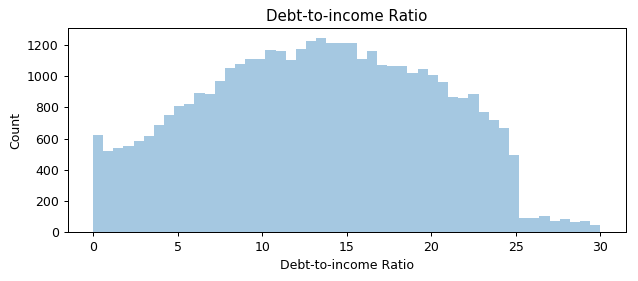

In [156]:
plt.figure(figsize=(8,3), dpi=90)
sns.distplot(master_loandata.loc[master_loandata['dti'].notnull() & (master_loandata['dti']<60), 'dti'], kde=False)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('Debt-to-income Ratio')

In [157]:
#earliest_cr_line
master_loandata['earliest_cr_line'].sample(5)

14693    Nov-03
7685     Aug-05
14443    Aug-93
29972    Aug-94
35798    Feb-94
Name: earliest_cr_line, dtype: object

In [158]:
master_loandata['earliest_cr_line'].isnull().any()

False

In [160]:
master_loandata['earliest_cr_line'] = master_loandata['earliest_cr_line'].apply(lambda s: int(s[-2:]))

In [161]:
master_loandata['earliest_cr_line'].describe()

count    39717.000000
mean        59.176499
std         43.935755
min          0.000000
25%          4.000000
50%         89.000000
75%         96.000000
max         99.000000
Name: earliest_cr_line, dtype: float64

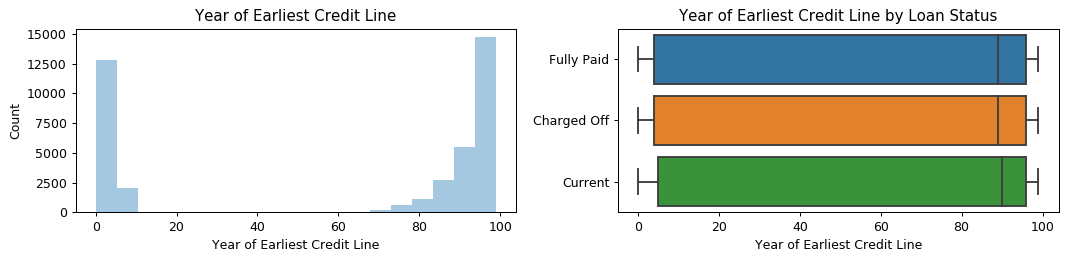

In [162]:
plot_var('earliest_cr_line', 'Year of Earliest Credit Line', continuous=True)

No difference found.

Text(0.5, 1.0, 'Number of Open Credit Lines')

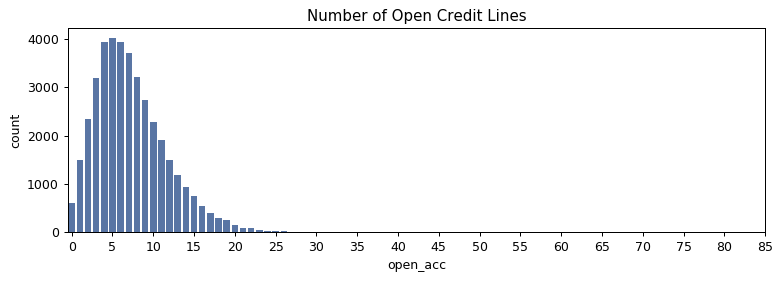

In [163]:
# open_acc
plt.figure(figsize=(10,3), dpi=90)
sns.countplot(master_loandata['open_acc'], order=sorted(master_loandata['open_acc'].unique()), color='#5975A4', saturation=1)
_, _ = plt.xticks(np.arange(0, 90, 5), np.arange(0, 90, 5))
plt.title('Number of Open Credit Lines')

In [164]:
master_loandata['pub_rec'].value_counts().sort_index()

0    37601
1     2056
2       51
3        7
4        2
Name: pub_rec, dtype: int64

In [165]:
master_loandata.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,0.084770,0.284873,0.0,0.0,0.0,0.0,2.0
Current,1140.0,0.042982,0.215497,0.0,0.0,0.0,0.0,2.0
Fully Paid,32950.0,0.050410,0.228429,0.0,0.0,0.0,0.0,4.0


Individuals having higher public records are likely to default. 

In [166]:
master_loandata['revol_util'].describe()

count    39717.000000
mean        48.770677
std         28.367689
min          0.000000
25%         25.300000
50%         49.200000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

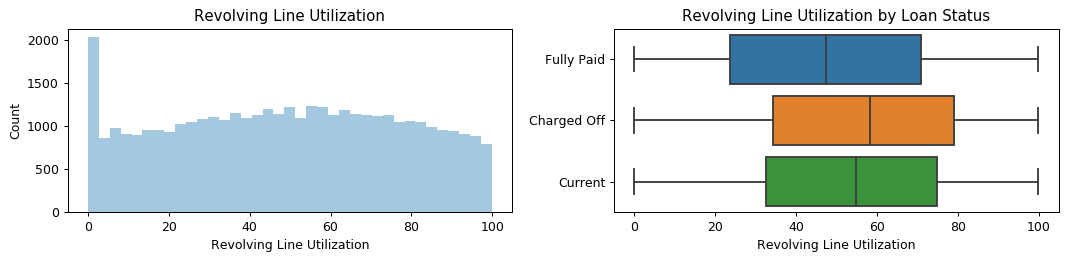

In [167]:
plot_var('revol_util', 'Revolving Line Utilization', continuous=True)

Credit utilization rate for charged off category is much higher.

In [168]:
master_loandata.groupby('loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,55.414095,28.022277,0.0,34.300,58.20,78.95,99.9
Current,1140.0,53.204482,26.873188,0.0,32.575,54.95,74.80,99.9
Fully Paid,32950.0,47.482755,28.303322,0.0,23.800,47.50,70.80,99.9


Text(0.5, 1.0, 'Total Number of Credit Lines')

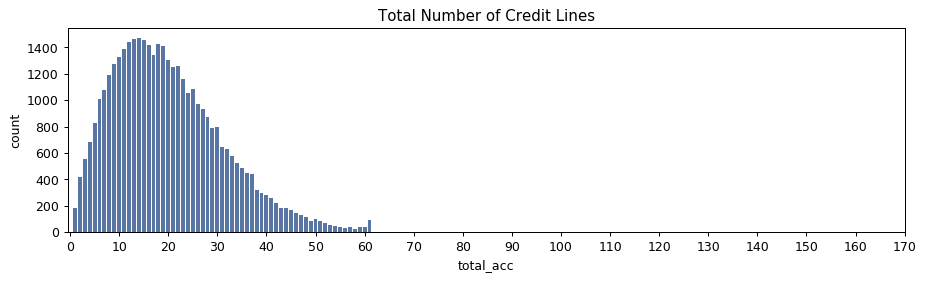

In [169]:
plt.figure(figsize=(12,3), dpi=90)
sns.countplot(master_loandata['total_acc'], order=sorted(master_loandata['total_acc'].unique()), color='#5975A4', saturation=1)
_, _ = plt.xticks(np.arange(0, 176, 10), np.arange(0, 176, 10))
plt.title('Total Number of Credit Lines')

In [170]:
master_loandata['pub_rec_bankruptcies'].value_counts().sort_index()

0.0    38036
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

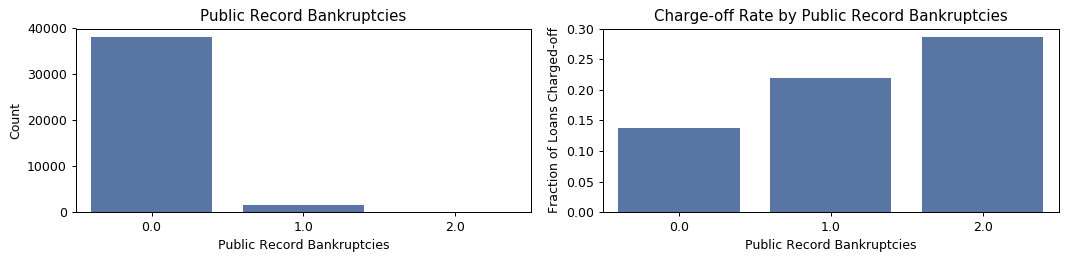

In [171]:
plot_var('pub_rec_bankruptcies', 'Public Record Bankruptcies', continuous=False)

In [ ]:
Individuals with record of bankruptcy has probability to default.

In [308]:
df_purp_emplen = master_loandata.groupby(['emp_length','purpose'])
df_purp_emplen = df_purp_emplen['loan_status'].value_counts()
df_purp_emplen = pd.DataFrame(df_purp_emplen)
df_purp_emplen.sort_index(inplace=True)
df_purp_emplen
df_purp_emplen.rename(columns={'loan_status':'total'}, inplace=True)
df_purp_emplen

total
emp_length purpose            loan_status       
0          car                Charged Off     22
                              Current          4
                              Fully Paid     155
           credit_card        Charged Off     54
                              Current          4
                              Fully Paid     546
           debt_consolidation Charged Off    292
                              Current         36
                              Fully Paid    1724
           educational        Charged Off     13
                              Fully Paid      57
           home_improvement   Charged Off     34
                              Current          7
                              Fully Paid     190
           house              Charged Off      5
                              Fully Paid      30
           major_purchase     Charged Off     29
                              Current          4
                              Fully Paid     234
           medical            Charged Off     15
                              Fully Paid      62
           moving             Charged Off     19
                              Current          1
                              Fully Paid     114
           other              Charged Off     76
                              Current         11
                              Fully Paid     438
           renewable_energy   Fully Paid       5
           small_business     Charged Off     61
                              Current          6
...                                          ...
10         educational        Fully Paid      38
           home_improvement   Charged Off    119
                              Current         45
                              Fully Paid     847
           house              Charged Off     15
                              Current          6
                              Fully Paid      74
           major_purchase     Charged Off     53
                              Current         14
                              Fully Paid     444
           medical            Charged Off     30
                              Current          5
                              Fully Paid     164
           moving             Charged Off     16
                              Current          1
                              Fully Paid      78
           other              Charged Off    179
                              Current         39
                              Fully Paid     797
           renewable_energy   Charged Off      5
                              Fully Paid      31
           small_business     Charged Off    113
                              Current         20
                              Fully Paid     270
           vacation           Charged Off     16
                              Current          6
                              Fully Paid     105
           wedding            Charged Off     21
                              Current          2
                              Fully Paid     100

[404 rows x 1 columns]

In [271]:
pf2 = master_loandata.pivot_table(index = "grade",
                                 columns = "loan_status",
                                 aggfunc = 'size', fill_value=0)
pf2['% of chargedoff'] = round(100*(pf2['Charged Off']/pf2.sum(axis=1)), 2)
pf2 = pd.DataFrame(pf2['% of chargedoff'])
pf2 = pf2.reset_index()
pf2

,grade,% of chargedoff
0,A,5.97
1,B,11.86
2,C,16.63
3,D,21.07
4,E,25.16
5,F,30.41
6,G,31.96


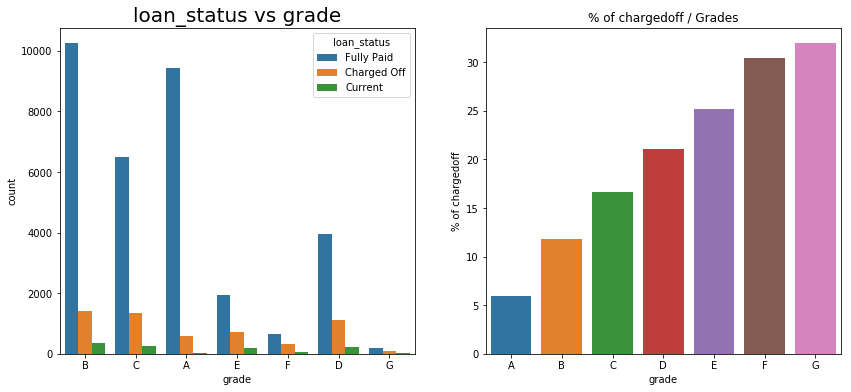

In [290]:
plt.figure(figsize = (14,6))
plt.subplot(121)
g = sns.countplot(x='grade',data=master_loandata,
                  hue='loan_status')
g.set_title("loan_status vs grade", fontsize=20)

plt.subplot(122)
sns.barplot(x='grade', y='% of chargedoff', data=pf2)
plt.title("% of chargedoff / Grades")

plt.show()

In [273]:
pf3 = master_loandata.pivot_table(index = "verification_status",
                                 columns = "loan_status",
                                 aggfunc = 'size', fill_value=0)
pf3['% of chargedoff'] = round(100*(pf3['Charged Off']/pf3.sum(axis=1)), 2)
pf3 = pd.DataFrame(pf3['% of chargedoff'])
pf3 = pf3.reset_index()
pf3

,verification_status,% of chargedoff
0,Not Verified,12.66
1,Source Verified,14.36
2,Verified,16.01


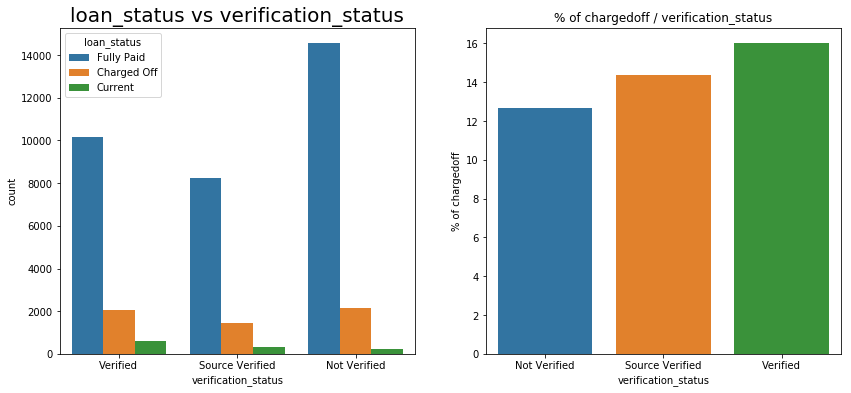

In [275]:
plt.figure(figsize = (14,6))
plt.subplot(121)
g = sns.countplot(x='verification_status',data=master_loandata,
                  hue='loan_status')
g.set_title("loan_status vs verification_status", fontsize=20)

plt.subplot(122)
sns.barplot(x='verification_status', y='% of chargedoff', data=pf3)
plt.title("% of chargedoff / verification_status")

plt.show()

In [276]:
pf4 = master_loandata.pivot_table(index = "purpose",
                                 columns = "loan_status",
                                 aggfunc = 'size', fill_value=0)
pf4['% of chargedoff'] = round(100*(pf4['Charged Off']/pf4.sum(axis=1)), 2)
pf4 = pd.DataFrame(pf4['% of chargedoff'])
pf4 = pf4.reset_index()
pf4

,purpose,% of chargedoff
0,car,10.33
1,credit_card,10.57
2,debt_consolidation,14.84
3,educational,17.23
4,home_improvement,11.66
5,house,15.49
6,major_purchase,10.15
7,medical,15.30
8,moving,15.78
9,other,15.85


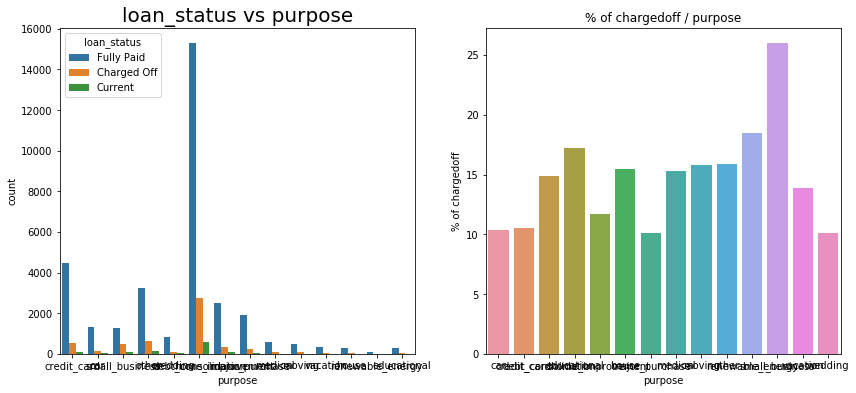

In [279]:
plt.figure(figsize = (14,6))
plt.subplot(121)
g = sns.countplot(x='purpose',data=master_loandata,
                  hue='loan_status')
g.set_title("loan_status vs purpose", fontsize=20)

plt.subplot(122)
sns.barplot(x='purpose', y='% of chargedoff', data=pf4)
plt.title("% of chargedoff / purpose")

plt.show()

In [280]:
pf5 = master_loandata.pivot_table(index = "inq_last_6mths",
                                 columns = "loan_status",
                                 aggfunc = 'size', fill_value=0)
pf5['% of chargedoff'] = round(100*(pf5['Charged Off']/pf5.sum(axis=1)), 2)
pf5 = pd.DataFrame(pf5['% of chargedoff'])
pf5 = pf5.reset_index()
pf5

,inq_last_6mths,% of chargedoff
0,0,11.81
1,1,15.29
2,2,16.23
3,3,20.31
4,4,15.64
5,5,19.18
6,6,25.00
7,7,28.57
8,8,20.00


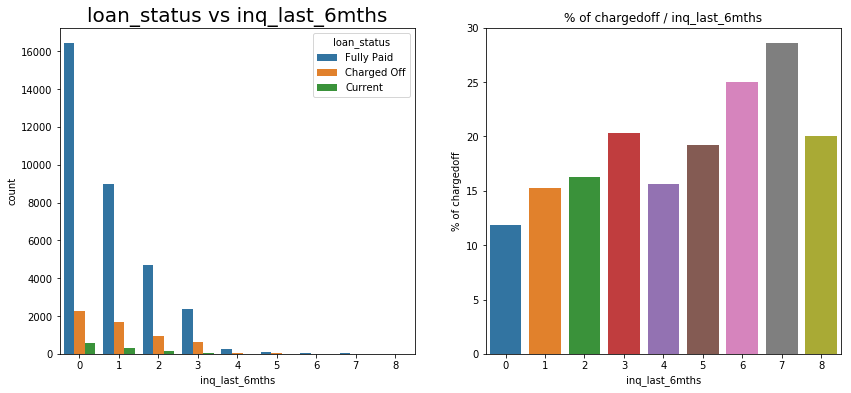

In [281]:
plt.figure(figsize = (14,6))
plt.subplot(121)
g = sns.countplot(x='inq_last_6mths',data=master_loandata,
                  hue='loan_status')
g.set_title("loan_status vs inq_last_6mths", fontsize=20)

plt.subplot(122)
sns.barplot(x='inq_last_6mths', y='% of chargedoff', data=pf5)
plt.title("% of chargedoff / inq_last_6mths")

plt.show()

In [173]:
pf6 = master_loandata.pivot_table(index = "home_ownership",
                                 columns = "loan_status",
                                 aggfunc = 'size', fill_value=0)
pf6['% of chargedoff'] = round(100*(pf6['Charged Off']/pf6.sum(axis=1)), 2)
pf6 = pd.DataFrame(pf6['% of chargedoff'])
pf6 = pf6.reset_index()
pf6

,home_ownership,% of chargedoff
0,MORTGAGE,13.18
1,OTHER,17.82
2,OWN,14.49
3,RENT,15.02


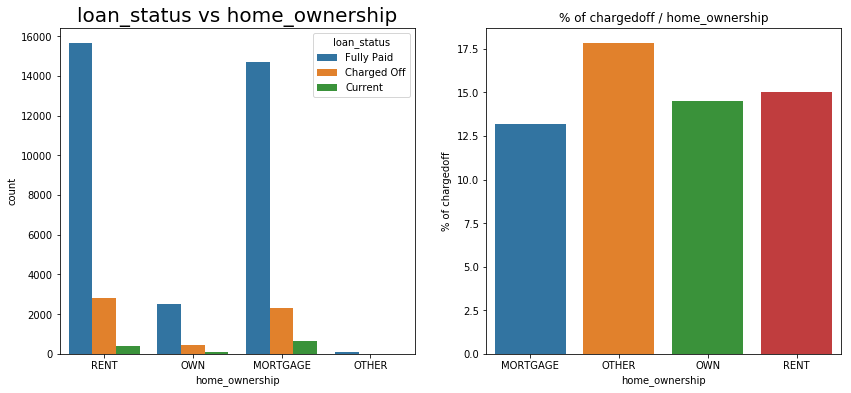

In [174]:
plt.figure(figsize = (14,6))
plt.subplot(121)
g = sns.countplot(x='home_ownership',data=master_loandata,
                  hue='loan_status')
g.set_title("loan_status vs home_ownership", fontsize=20)

plt.subplot(122)
sns.barplot(x='home_ownership', y='% of chargedoff', data=pf6)
plt.title("% of chargedoff / home_ownership")

plt.show()

In [288]:
pf7 = master_loandata.pivot_table(index = "delinq_2yrs",
                                 columns = "loan_status",
                                 aggfunc = 'size', fill_value=0)
pf7['% of chargedoff'] = round(100*(pf7['Charged Off']/pf7.sum(axis=1)), 2)
pf7 = pd.DataFrame(pf7['% of chargedoff'])
pf7 = pf7.reset_index()
pf7

,delinq_2yrs,% of chargedoff
0,0,13.94
1,1,15.35
2,2,18.92
3,3,15.91
4,4,20.97
5,5,13.64
6,6,10.00
7,7,25.00
8,8,50.00
9,9,0.00


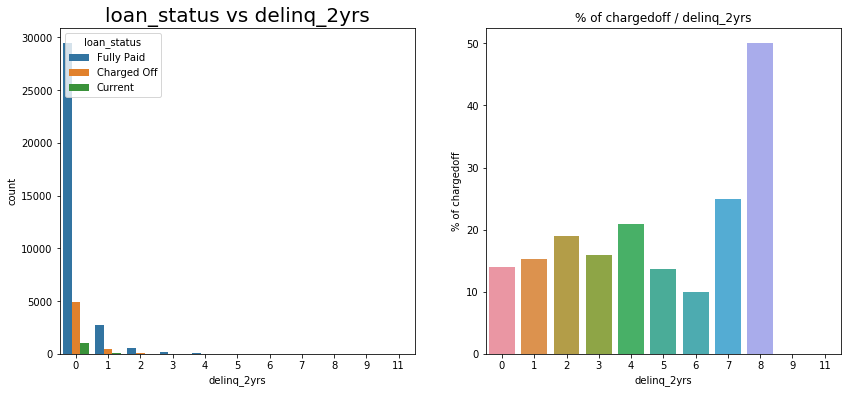

In [286]:
plt.figure(figsize = (14,6))
plt.subplot(121)
g = sns.countplot(x='delinq_2yrs',data=master_loandata,
                  hue='loan_status')
g.set_title("loan_status vs delinq_2yrs", fontsize=20)

plt.subplot(122)
sns.barplot(x='delinq_2yrs', y='% of chargedoff', data=pf7)
plt.title("% of chargedoff / delinq_2yrs")

plt.show()

In [292]:
pf8 = master_loandata.pivot_table(index = "pub_rec_bankruptcies",
                                 columns = "loan_status",
                                 aggfunc = 'size', fill_value=0)
pf8['% of chargedoff'] = round(100*(pf8['Charged Off']/pf8.sum(axis=1)), 2)
pf8 = pd.DataFrame(pf8['% of chargedoff'])
pf8 = pf8.reset_index()
pf8

,pub_rec_bankruptcies,% of chargedoff
0,0.0,13.83
1,1.0,21.86
2,2.0,28.57


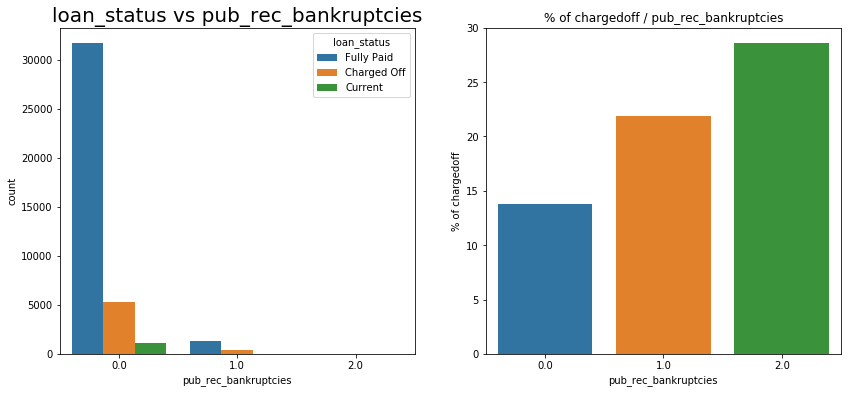

In [294]:
plt.figure(figsize = (14,6))
plt.subplot(121)
g = sns.countplot(x='pub_rec_bankruptcies',data=master_loandata,
                  hue='loan_status')
g.set_title("loan_status vs pub_rec_bankruptcies", fontsize=20)

plt.subplot(122)
sns.barplot(x='pub_rec_bankruptcies', y='% of chargedoff', data=pf8)
plt.title("% of chargedoff / pub_rec_bankruptcies")

plt.show()